In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cars_messy.csv')
data.head(5)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,DoorNum
0,Chevrolet Chevelle Malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,US,NaN
1,Buick Skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,US,NaN
2,Plymouth Satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,US,NaN
3,AMC Rebel SST,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,US,NaN
4,Ford Torino,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,US,NaN


In [3]:
#2.1.1. Remove all the leading and trailing spaces in the data
data.columns = data.columns.str.strip()

In [4]:
#2.1.2 Check if there are duplicates.
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1


In [5]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,DoorNum
count,401.000000,403.000000,398.000000,401.000000,400.000000,399.000000,403.000000,3.000000
mean,23.084539,5.466501,193.393216,102.827930,2975.342500,15.544612,75.910670,3.333333
std,8.411873,1.707678,103.977481,39.905549,845.063899,2.780697,3.753865,1.154701
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,2.000000
25%,17.000000,4.000000,104.250000,75.000000,2225.250000,13.750000,73.000000,3.000000
50%,22.400000,4.000000,148.500000,92.000000,2822.500000,15.500000,76.000000,4.000000
75%,29.000000,8.000000,265.750000,125.000000,3614.750000,17.200000,79.000000,4.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,4.000000


In [6]:
#2.2.1 Display the null/missing values.
print('Number of instances = %d\nNumber of attributes = %d' % (data.shape[0], data.shape[1]))
print('------------------------------')
data.isnull().sum()

Number of instances = 405
Number of attributes = 10
------------------------------


Car               0
MPG               4
Cylinders         2
Displacement      7
Horsepower        4
Weight            5
Acceleration      6
Model             2
Origin            1
DoorNum         402
dtype: int64

In [7]:
#2.2.2 Drop columns with 90+% null values.
if 'DoorNum' in data.columns:
    data = data.drop(['DoorNum'], axis=1)
    
print('Number of attributes = %d' % (data.shape[1]))

Number of attributes = 9


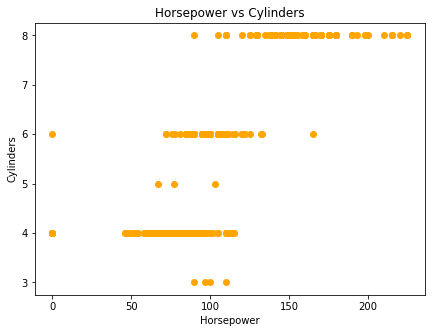

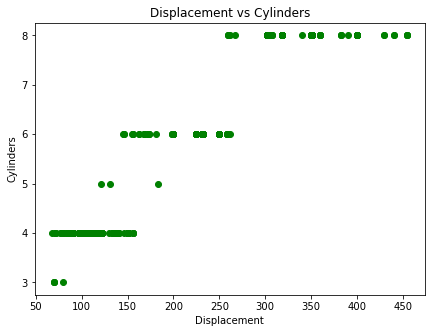

In [8]:
#2.2.3.1 Draw two plots for Horsepower vs Cylinders and Displacement vs Cylinders to explore them with visualization. Hint: The outputs should be similar to:

#plot 1
plt.figure(figsize=(7, 5))

plt.scatter(data.Horsepower, data.Cylinders,c='orange', marker='o')
plt.xlabel('Horsepower', fontsize=10)
plt.ylabel('Cylinders', fontsize=10)
plt.title('Horsepower vs Cylinders', fontsize=12)

plt.figure(figsize=(7, 5))

plt.scatter(data.Displacement, data.Cylinders,c='green', marker='o')
plt.xlabel('Displacement', fontsize=10)
plt.ylabel('Cylinders', fontsize=10)
plt.title('Displacement vs Cylinders', fontsize=12)

plt.show()

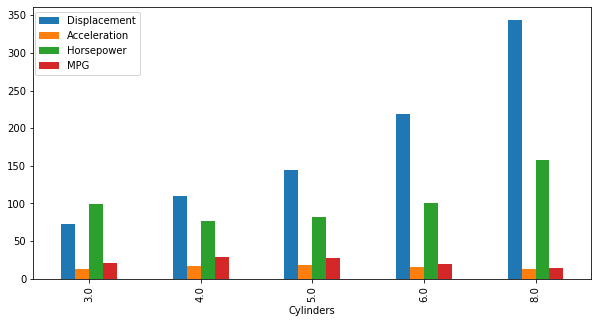

In [9]:
#2.2.3.2 Plot a grouped bar chart for Displacement, Acceleration, MPG, and Horsepower grouped by Cylinders.
data[['Displacement','Acceleration','Horsepower','MPG', 'Cylinders']].groupby('Cylinders').mean().plot(kind='bar', figsize=(10, 5))
plt.legend(bbox_to_anchor=(0.2, 1))

In [10]:
#2.2.3.3 What can you find from above two charts to better impute the different feature missing values? Do you have any solutions for each of them and why? Please briefly explain in the code notebook.



In [11]:
#2.2.4 Impute all the missing values with median 
data = data.fillna(data.median())


<AxesSubplot:>

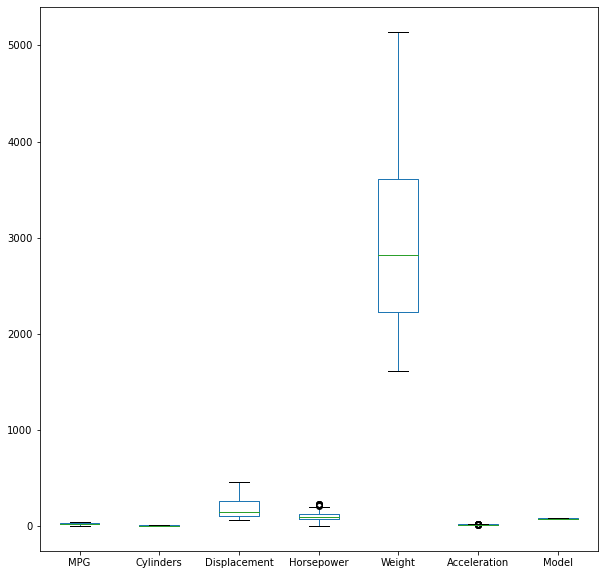

In [12]:
#2.3.1 Draw boxplots in one figure to identify the features/columns that contain outliers. 
data[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model']].plot.box(figsize = (10, 10))

<AxesSubplot:>

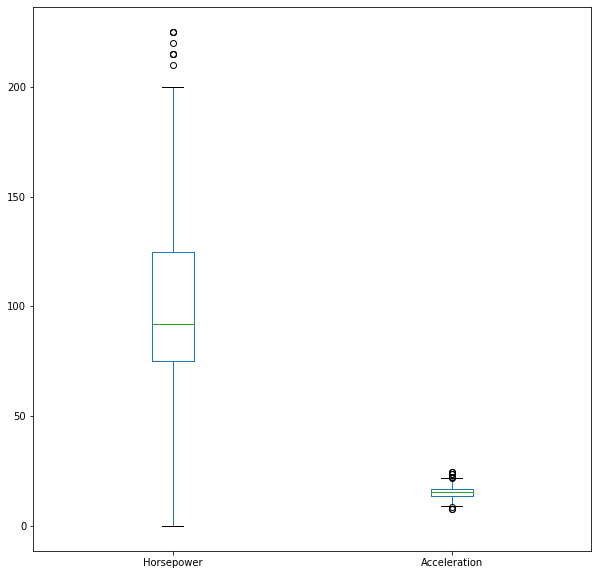

In [13]:
#2.3.2 Draw boxplots in one figure only containing outliers.
data[['Horsepower', 'Acceleration']].plot.box(figsize = (10, 10))

In [14]:
#2.3.3 Come up with one approach to discard outliers and implement it.


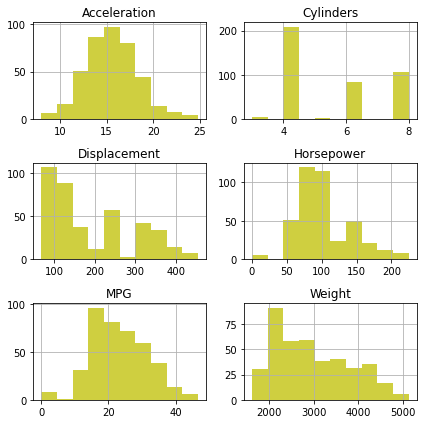

In [15]:
#2.4.1 Draw multiple histograms for all numerical attributes. What can you find? Please clearly explain in the notebook
data[['Acceleration', 'Cylinders', 'Displacement', 'Horsepower', 'MPG', 'Weight']].hist(figsize=(6, 6), bins=10, alpha = 0.75, color = 'y')
plt.tight_layout()
plt.show()



In [16]:
#2.4.2 Calculate a correlation matri
df = data[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model']]
df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
MPG,1.000000,-0.729077,-0.757024,-0.727982,-0.782433,0.416466,0.585456
Cylinders,-0.729077,1.000000,0.941966,0.821724,0.890954,-0.495347,-0.359636
Displacement,-0.757024,0.941966,1.000000,0.866253,0.920098,-0.527868,-0.369139
Horsepower,-0.727982,0.821724,0.866253,1.000000,0.840451,-0.658436,-0.415500
Weight,-0.782433,0.890954,0.920098,0.840451,1.000000,-0.416135,-0.306802
Acceleration,0.416466,-0.495347,-0.527868,-0.658436,-0.416135,1.000000,0.295758
Model,0.585456,-0.359636,-0.369139,-0.415500,-0.306802,0.295758,1.000000


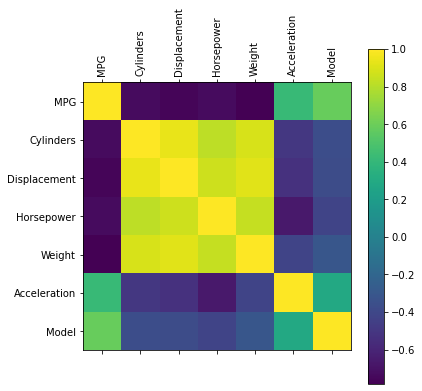

In [17]:
#Draw a correlation matrix. What can you find? Please explain in the notebook. 
plt.rcParams["figure.figsize"] = (6,6)
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()

plt.show()

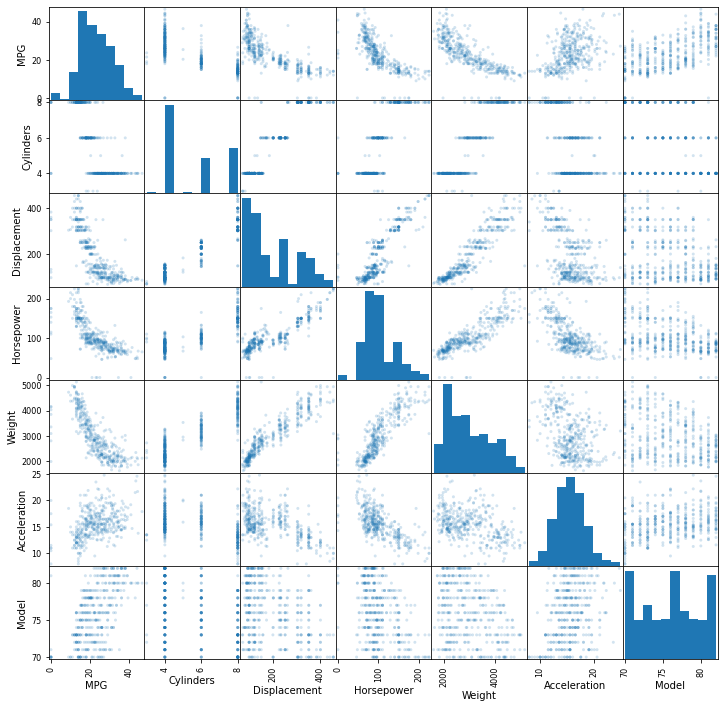

In [18]:
#2.4.3 Draw a scatter matrix. What can you find? Please clearly explain in the notebook
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df, alpha=0.2, figsize = (12, 12))